##**Problem Statement**

**About Aerofit**
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
1.	Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2.	For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset**

**Product Purchased:**	KP281, KP481, or KP781

**Age:**	In years

**Gender:**	Male/Female

**Education:**	In years

**MaritalStatus:**	Single or partnered

**Usage:**	The average number of times the customer plans to use the treadmill each week.

**Income:**	Annual income

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

•	The KP281 is an entry-level treadmill that sells for 1,500.

•	The KP481 is for mid-level runners that sell for 1,750.

•	The KP781 treadmill is having advanced features that sell for 2,500.
all in dollars

**What good looks like?**

1.	Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
2.	Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
3.	Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
4.	Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
5.	Check correlation among different factors using heat maps or pair plots.
6.	With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
7.	Customer Profiling - Categorization of users.
8.	Probability- marginal, conditional probability.
9.	Some recommendations and actionable insights, based on the inferences.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [10]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 21.6MB/s]


##Q1.	Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [11]:
data = pd.read_csv('aerofit_treadmill.csv?1639992749')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [12]:
data.shape

(180, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


as from above observation we can see there no missing value and also the data type of columns are such as its need to be like for age,education(years),usage,fitness,income and miles are all integer type and the remaining are of string type so there is no requirement of changing data type of any column in the given data


In [14]:
data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

## Q2. Checking outlier using describe and boxplot

In [15]:
data.loc[data['Product']=='KP281'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [16]:
data.loc[data['Product']=='KP481'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [17]:
data.loc[data['Product']=='KP781'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


#Checking Outlier for age,usage,education,fitness,income,miles

<Axes: xlabel='Product', ylabel='Usage'>

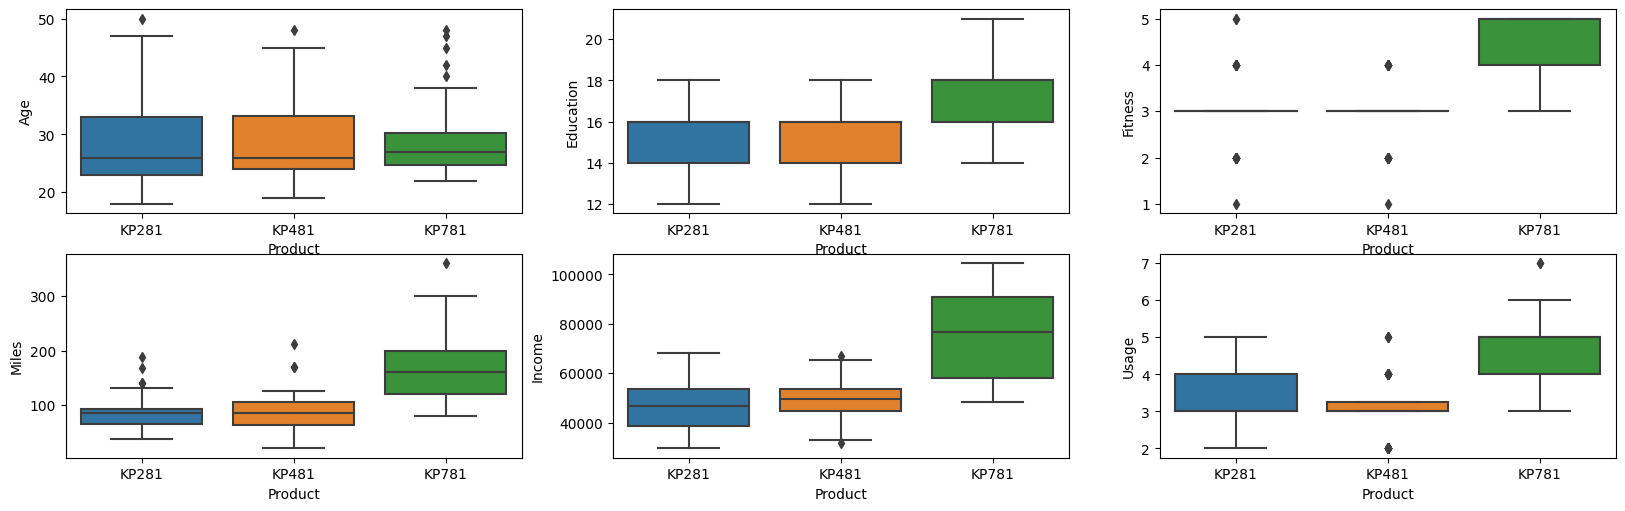

In [18]:
plt.figure(figsize=(20,9))
plt.subplot(3,3,1)
sns.boxplot(data=data,x='Product',y='Age')
plt.subplot(3,3,2)
sns.boxplot(data=data,x='Product',y='Education')
plt.subplot(3,3,3)
sns.boxplot(data=data,x='Product',y='Fitness')
plt.subplot(3,3,4)
sns.boxplot(data=data,x='Product',y='Miles')
plt.subplot(3,3,5)
sns.boxplot(data=data,x='Product',y='Income')
plt.subplot(3,3,6)
sns.boxplot(data=data,x='Product',y='Usage')

##**Insight**:  if we can see from above analysis for outliers detection we can say that for:

**Figure which compare age and product** -- have 1 outlier for each for KP281 and KP481 & 5 outliers for KP781 with age as a criteria

**Education and Product**- no Outliers detected

**Fitness/Usage and Product:** --  outlier detected in
Fitness and Usage graph with products are found as such that product have discrete set of data which need to be analysed accordingly as it is given

**Miles and Products:** -- KP281 have 3 outlier KP481 have 2 and KP781 have 1 outliers in miles

**Income and Products** -- Only KP481 have 2 outliers with respect to income remaining product have no oultliers in it

we can do seperate check for outliers for Male and Female customer w.r.t Products but we have not enough data so it is better to consider them as single individuals and analyse accordingly



##Q.3 Check if features like marital status, age have any effect on the product purchased

Approach:

In [19]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<Axes: xlabel='MaritalStatus', ylabel='count'>

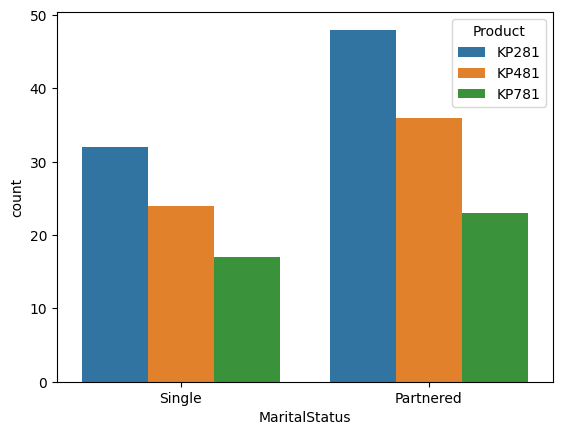

In [20]:
sns.countplot(data=data,x='MaritalStatus',hue='Product')

From the above graph we can infer that

**Insights:**
1. **KP281** is ***bought maximum*** among the **singles** and similar **KP281** is **bought in maximum number** by ***partnered*** as KP281 is an entry-level treadmill which is of least cost among treadmills furthermore KP781 treadmill is having advanced features with maximum costs is least purchased by people having Single and Partnered MaritalStatus

2.Partnered bought mostly the KP281 Treadmill

**Recommendations:**

since most KP281 is most bought among partner and single the firm should increase their inventroy of KP281 treadmill so as not to lag demands of customers also for other treadmill need to be added with offer so as to increase customemr interest consequently increasing the revenue of firm.





# Person age and KP281 Trademill

<Axes: xlabel='Age', ylabel='Count'>

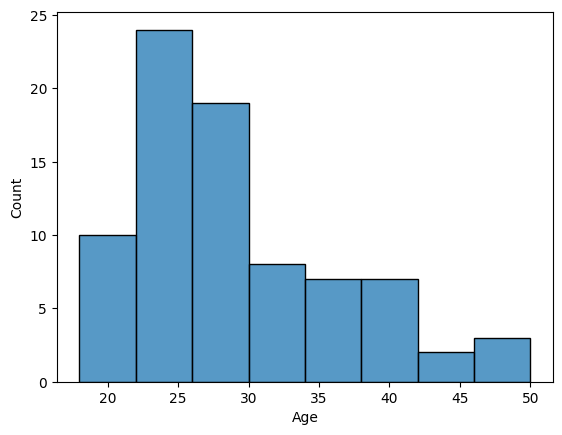

In [21]:
sns.histplot(data=data.loc[data['Product']=='KP281'],x='Age')

**Insights:** from above graph we can say KP281 is mostly preffered by the individuals in the age range close to 24-25 years old



#Person age and KP481 Trademill

<Axes: xlabel='Age', ylabel='Count'>

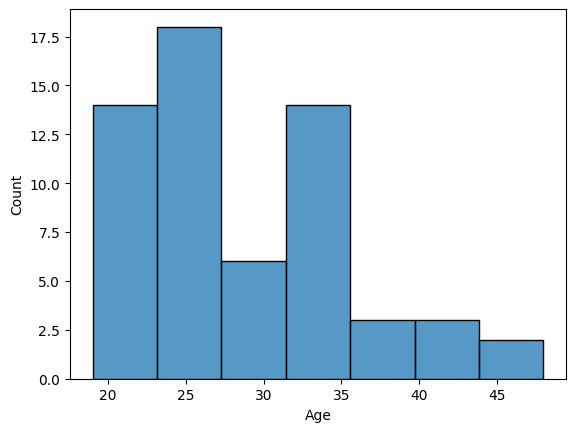

In [22]:
sns.histplot(data=data.loc[data['Product']=='KP481'],x='Age')

**Insights:** from above graph we can say KP481 is mostly preffered by the individuals in the age range close to around 25 years old

#Person age and KP781 Treadmill

<Axes: xlabel='Age', ylabel='Count'>

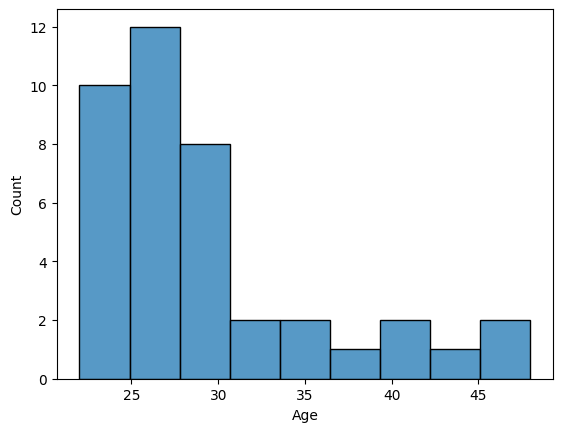

In [23]:
sns.histplot(data=data.loc[data['Product']=='KP781'],x='Age')

**Insights:** from above graph we can say KP781 is mostly preffered by the individuals in the age range close grater than 25 years old and less than 30 year old

**Recommendations:**   it is clear from above three graphs if a person is close to age around 25 years of age  it is for sure he/she is going to buy among these three treadmill , for their further choice we have to look over other parameter usage,fitness score, salary, marital status to recommend them the right treadmill for him/her for , the further analysis around such scenario has been done in below process

#checking Marital status,age effect on product purchased

<Axes: xlabel='Product', ylabel='Age'>

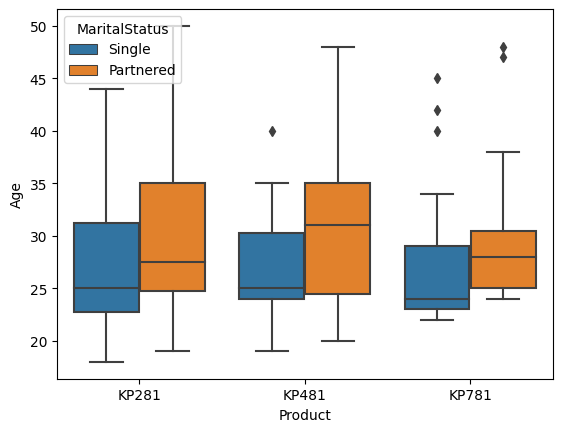

In [24]:
sns.boxplot(data=data,x='Product',y='Age',hue='MaritalStatus')

**Insights**:  for all the partnered individuals whether male or female median age are more than single individuals either male/female , median age for singles male and female for all type of Treadmill is close to 25 years while partnered median age are more than 25 for kp281 , for kp481 it is 30 years and kp781 median age for partnered is in between 25 to 30 approx. 27 years.


#Q.4	Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

In [25]:
pd.crosstab(data['Product'],[data['Gender'],data['MaritalStatus']],margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

# Marginal probability distribution for calculation of percentages of people with their profiles

In [67]:
pd.crosstab(data['Product'],[data['Gender'],data['MaritalStatus']],normalize='all')

Gender           Female                Male          
MaritalStatus Partnered    Single Partnered    Single
Product                                              
KP281          0.150000  0.072222  0.116667  0.105556
KP481          0.083333  0.077778  0.116667  0.055556
KP781          0.022222  0.016667  0.105556  0.077778

**Insights:**
 1. if individual is Female and partnered most of them choose KP281 treadmill with highest probability as 0.15
 2. if female is single there is a proximity in choosing either KP281 or KP481 but among them KP481 is highest preffered with probability 0.0777
 3.Male+ Partnered : equal purchasing probability of KP281 and KP481 of treadmill
 4. male+ single : KP281 is preffered most

**Recommendations:**

as according to the above analysis if a person or individuals follows the maritalstatus and gender criteria wee can suggest him/her the corresponding Treadmill keeping in mind the highest chance/probibility of buying a product with respect to their marital status and gender.e.g- if individual is **male+single : he should be recommended KP281 Treadmill**

##Q5.	Check correlation among different factors using heat maps or pair plots.

#checking correlation

In [28]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


#**Heatmap**

<ipython-input-29-4744123c13fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True,cmap='Blues')


<Axes: >

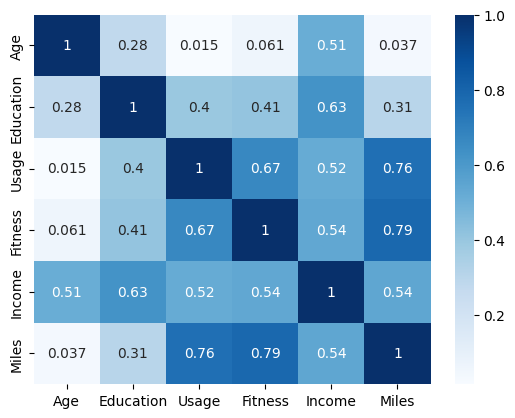

In [29]:
sns.heatmap(data=data.corr(),annot=True,cmap='Blues')

**Insights:** from above graph we can say
1. Fitness and miles are highly correlated
2.miles and usage are highly correlated
3.usage and fitness are highly correlated
4.income and age are hihly correlated

**recommendation:** analysis around these characteristics as mentioned in insights of an individuals would fetch a useful and insightful outcomes

##Q6.  What is the probability of a male customer buying a KP781 treadmill?

In [30]:
pd.crosstab(data['Product'],data['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


to check probability of male customer buying KP781 we can use normalize in crosstab for finding probability as required as shown below

In [68]:
pd.crosstab(data['Product'],data['Gender'],normalize='columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


$$ P(\text{KP781}, \text{male}) = 0.317 $$


**insights:** as per above data the probability of *male customer buying KP781* would be ***0.3173***

#Q7. Customer profiling

##Categorization of users.

In [32]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## A) Categorization of users for KP281 Trademill

In [33]:
T1 =data.loc[data['Product']=='KP281']
T1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


## Number of male and female users who opted KP281 treadmill

In [34]:
T1['Gender'].value_counts()

Male      40
Female    40
Name: Gender, dtype: int64

**Insights:** from above analysis it is clear that there are  40 males and
40 females who considered KP281 treadmill

if we want to further analyse we can subcategorize customer on basis of male and female. lets start with male

# Male(KP281)

# **1.income + usage** : Considering this as a criteria we can profile the number of males who opted KP281

**Usage**:	The average number of times the customer plans to use the treadmill each week.

**income**: Annual income(in $)

In [ ]:
T1_M = T1.loc[T1['Gender']=='Male']
T1_M

<Axes: xlabel='Usage', ylabel='Income'>

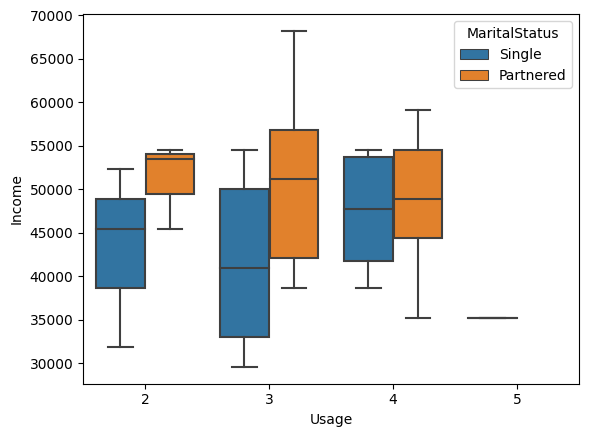

In [36]:
sns.boxplot(data=T1_M,x='Usage',y='Income',hue='MaritalStatus')

**Insights**:as per from above graph we can say

1. Mens who are single an who bought KP281 as per data have lower median salary
overall as compared to partnered  
2. single men with  2 time,3 time,4 time average usage of treadmill perweek  have their median salary close to 45000,40000,47500 preffered KP281 treadmill
3. partnered men with 2 time,3 time,4 time average usage of treadmill perweek  have their median salary close to 52500,51000,49000 preffered KP281 treadmill



##**2. Fitness+Miles:** Considering this as a criteria we can profile the number of males who opted KP281

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week


<Axes: xlabel='Miles', ylabel='Count'>

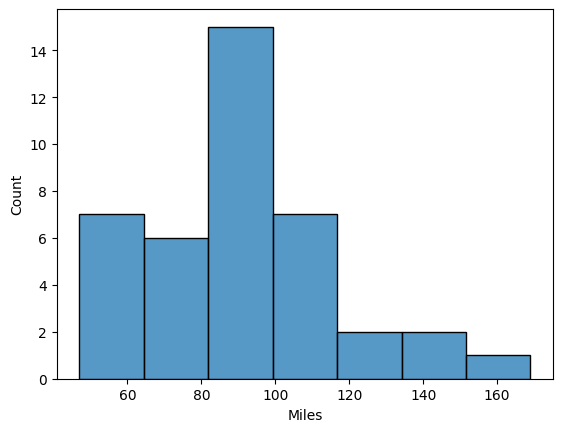

In [37]:
T1_M
sns.histplot(data=T1_M,x='Miles')

Males who bought KP281 trademill most of them are from around who expects themselves to walk around 80-100 miles

<Axes: xlabel='Fitness', ylabel='count'>

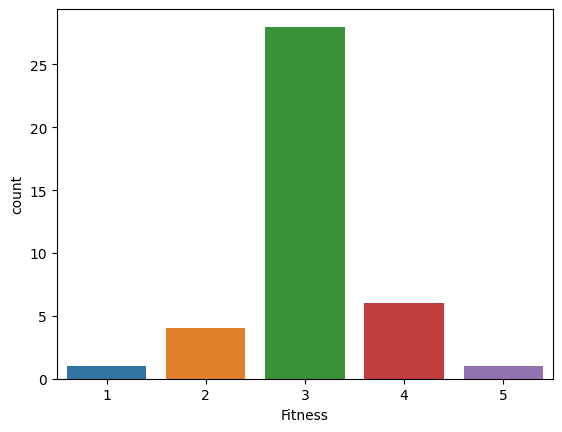

In [38]:
sns.countplot(data=T1_M,x='Fitness')

**insight:** males who preferred KP281 are most in number who rate their fitness score -3

# **3. Usage:** Considering this as a criteria we can profile the number of males who opted KP281

**Usage:**	The average number of times the customer plans to use the treadmill each week.

<Axes: xlabel='Usage', ylabel='count'>

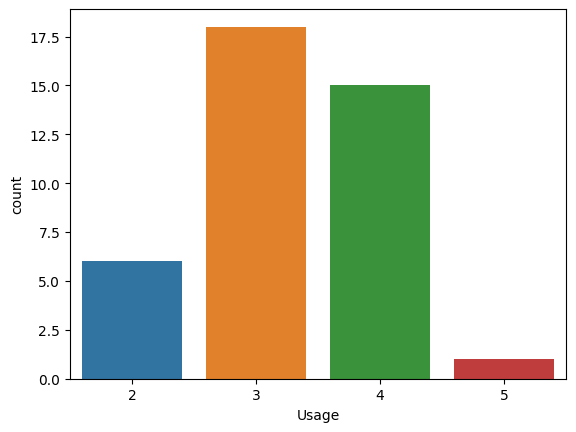

In [39]:
sns.countplot(data=T1_M,x='Usage')

**Insights:** Males who bought KP281 are mostly those who plans **to use it 3 times in a week** on an average

## **4. Education:** categorization customer consider this as parameter

<Axes: xlabel='Education', ylabel='count'>

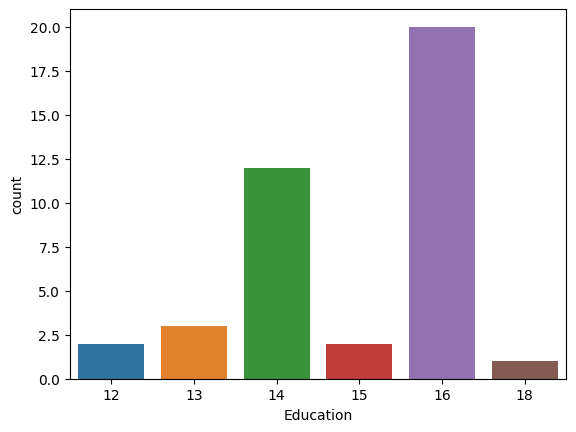

In [40]:
sns.countplot(data=T1_M,x='Education')

Insights: Graph depicts males who considered KP281 Treadmill most of them have education of 16 years

#Female(KP281)

# **1.income + usage** : Considering this as a criteria we can profile the number of females who opted KP281

**Usage**:	The average number of times the customer plans to use the treadmill each week.

**income**: Annual income(in $)

In [41]:
T1_F = T1.loc[T1['Gender']=='Female']
T1_F.shape

(40, 9)

<Axes: xlabel='Usage', ylabel='Income'>

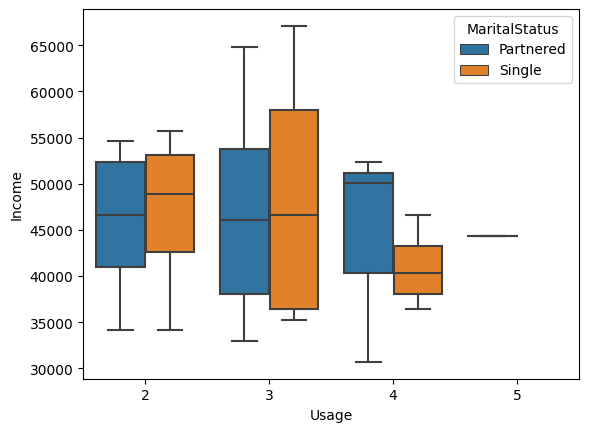

In [42]:
sns.boxplot(data=T1_F,x='Usage',y='Income',hue='MaritalStatus')

**Insights**:as per from above graph we can say

1. single Female who bought KP281 are planning to have **2,3 times** of average usage per week **have higher median salary** as compared to partnered female with same usage except female planning 4 time per week of average usage.

2. single Females with  2 time,3 time,4 time average usage of trademill perweek  have their median salary close to 50000,45000,40000 preffered KP281 trademill

3. partnered Females with 2 time,3 time,4 time average usage of trademill perweek  have their median salary close to 45000,45000,50000 preffered KP281 trademill



##**2. Fitness+Miles:** Considering this as a criteria we can profile the number of Females who opted KP281

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week

<Axes: xlabel='Miles', ylabel='Count'>

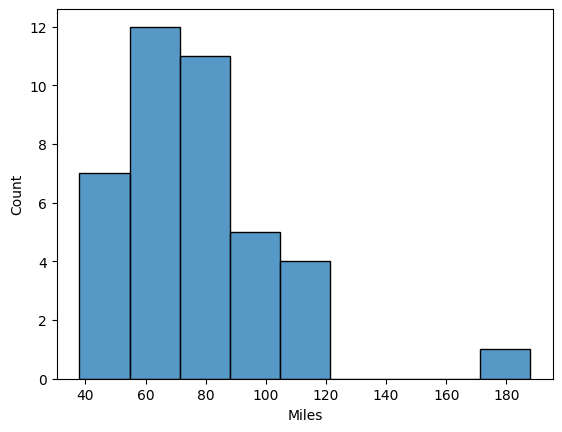

In [43]:
sns.histplot(data=T1_F,x='Miles')

**Insights:** Females who bought KP281 treadmill most of them are from around who expects themselves to walk around 60-80 miles

<Axes: xlabel='Fitness', ylabel='count'>

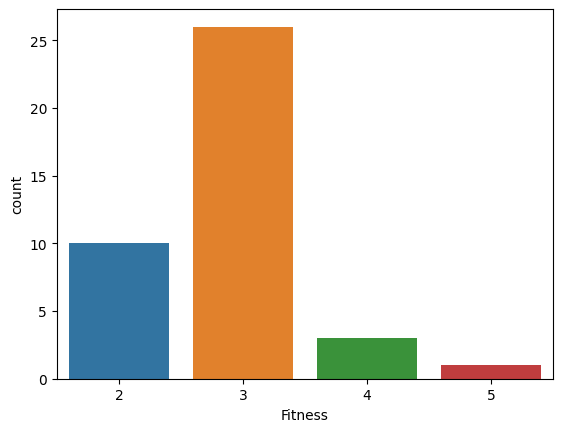

In [44]:
sns.countplot(data=T1_F,x='Fitness')

**insight:** Females who preferred KP281 are most in number who rate their fitness score -3

# **3. Usage:** Considering this as a criteria we can profile the number of Females who opted KP281

**Usage:**	The average number of times the customer plans to use the treadmill each week.

<Axes: xlabel='Usage', ylabel='count'>

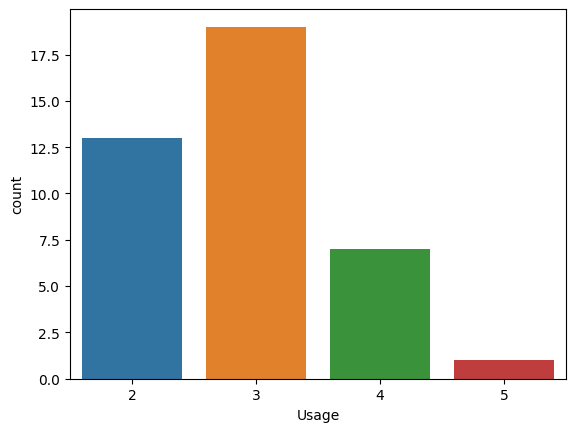

In [45]:
sns.countplot(data=T1_F,x='Usage')

**Insights:** Female who bought KP281 are mostly those who plans **to use it 3 times in a week** on an average

## **4. Education:** categorization customer consider this as parameter

## B) Categorization of users for KP481 Treadmill

In [46]:
T2 =data.loc[data['Product']=='KP481']
T2['Gender'].value_counts()

Male      31
Female    29
Name: Gender, dtype: int64

#SUBPLOT : for analyzing data around males/female who preffered KP481 Treadmill

##Males(KP481)

In [47]:
T2_M = T2.loc[T2['Gender']=='Male']
T2_M.shape

(31, 9)

Text(0.5, 1.0, 'Mens v/s Average number of times plan to use in a week')

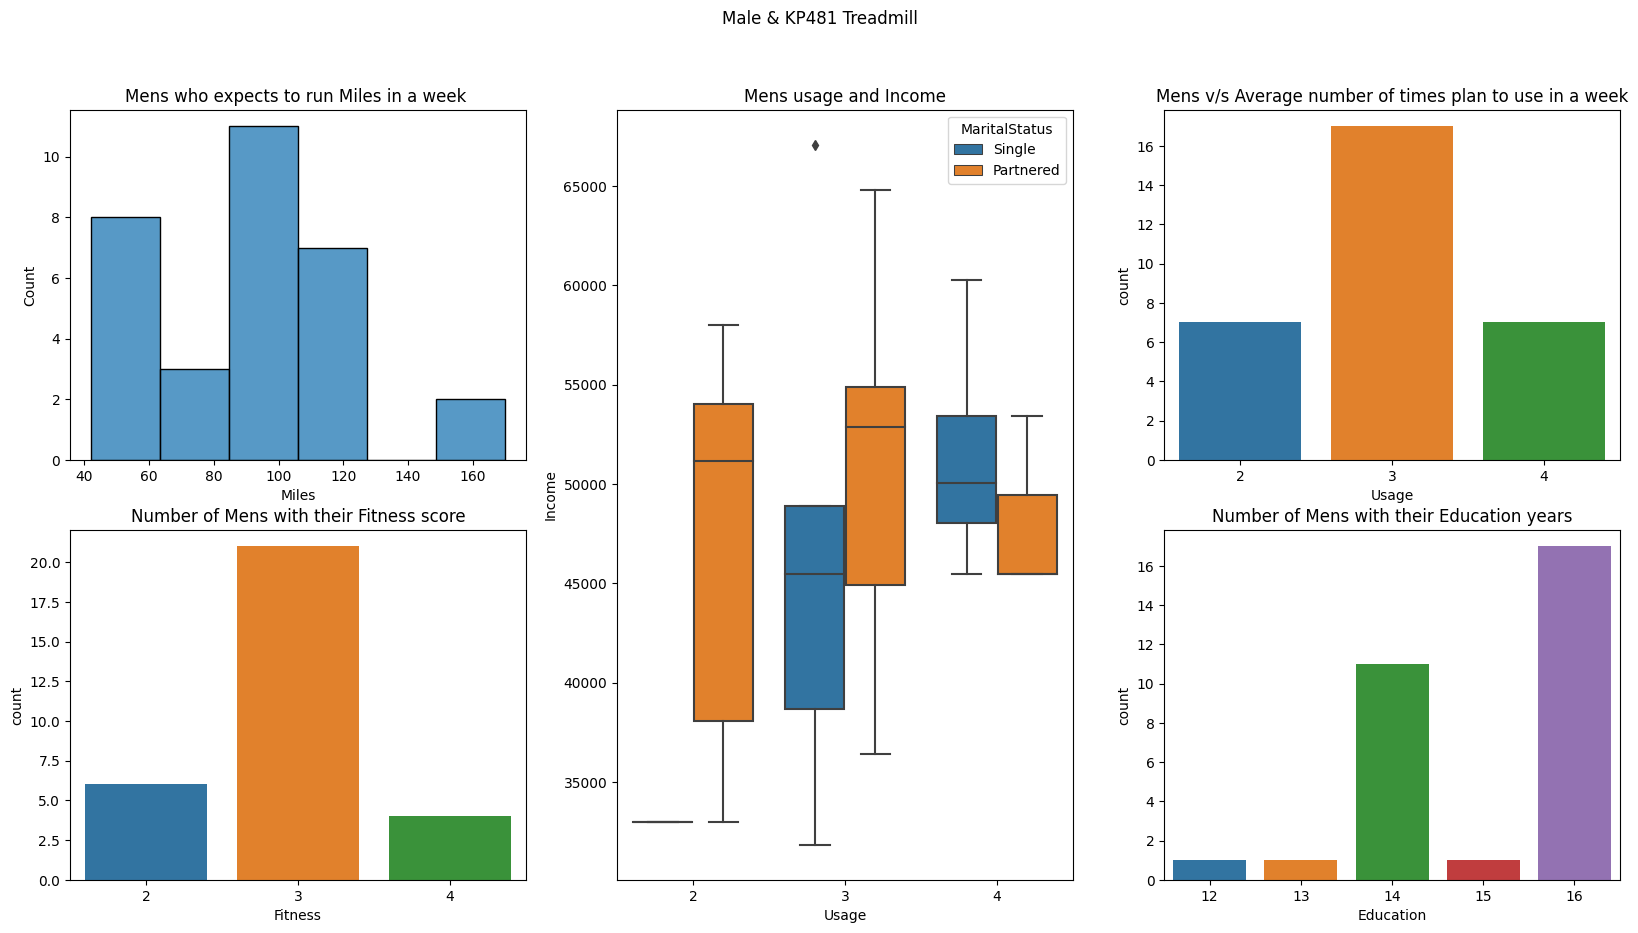

In [69]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Male & KP481 Treadmill")
plt.subplot(1,3,2)
sns.boxplot(data=T2_M,x='Usage',y='Income',hue='MaritalStatus')
plt.title('Mens usage and Income')
plt.subplot(2,3,1)
sns.histplot(data=T2_M,x='Miles')
plt.title('Mens who expects to run Miles in a week ')
plt.subplot(2,3,4)
sns.countplot(data=T2_M,x='Fitness')
plt.title('Number of Mens with their Fitness score')
plt.subplot(2,3,6)
sns.countplot(data=T2_M,x='Education')
plt.title('Number of Mens with their Education years')
plt.subplot(2,3,3)
sns.countplot(data=T2_M,x='Usage')
plt.title('Mens v/s Average number of times plan to use in a week')

**Insights:**

1.Mens who opted KP481 most among them expects themselves to run around **100 miles**

2.Mens who opted KP481 most among them Scores themselves at **3 fitness scale**

3.Mens who opted KP481 **have highest median salary**  who **were partnered** and expects**3 times** a week on average usage

4.Mens who opted KP481 maximum among them plans to **use 3 times a week**

5.Mens who opted KP481 maximum among them have **education of 16 years** in their life

**Recommendation:** from above insights we can profile mens who opted KP481 Treadmill

##Female(KP481)

In [49]:
T2_F = T2.loc[T2['Gender']=='Female']
T2_F.shape

(29, 9)

Text(0.5, 1.0, 'Female v/s Average number of times plan to use in a week')

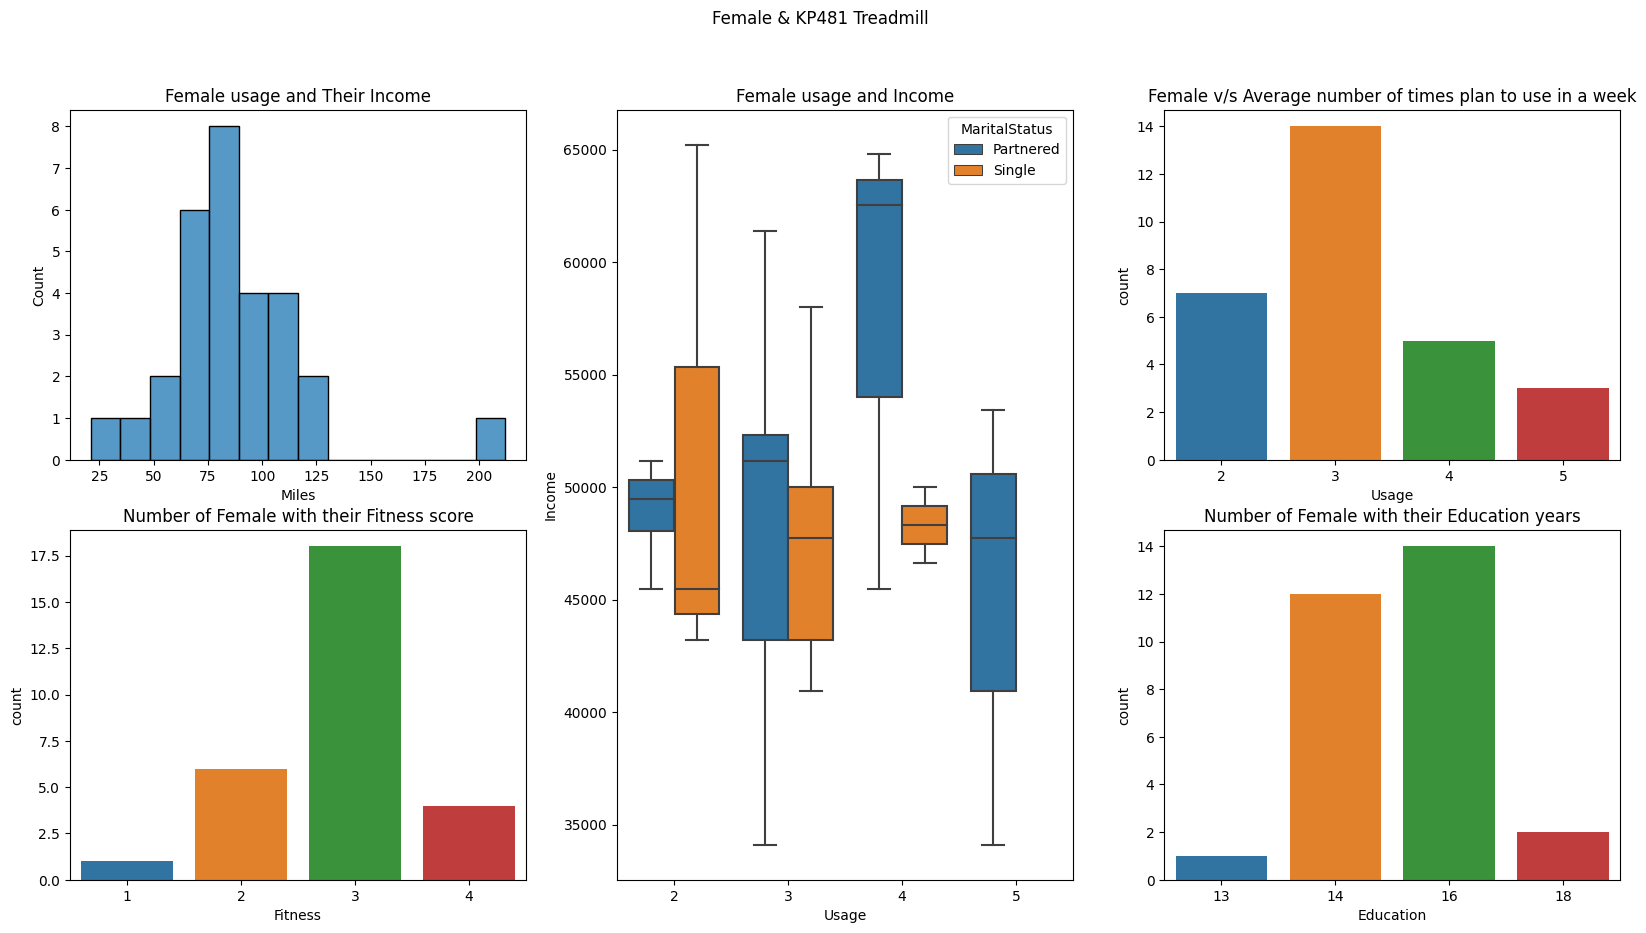

In [50]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Female & KP481 Treadmill")
plt.subplot(1,3,2)
sns.boxplot(data=T2_F,x='Usage',y='Income',hue='MaritalStatus')
plt.title('Female usage and Income')
plt.subplot(2,3,1)
sns.histplot(data=T2_F,x='Miles')
plt.title('Female usage and Their Income')
plt.subplot(2,3,4)
sns.countplot(data=T2_F,x='Fitness')
plt.title('Number of Female with their Fitness score')
plt.subplot(2,3,6)
sns.countplot(data=T2_F,x='Education')
plt.title('Number of Female with their Education years')
plt.subplot(2,3,3)
sns.countplot(data=T2_F,x='Usage')
plt.title('Female v/s Average number of times plan to use in a week')

**Insights:**

1.Female who opted KP481 most among them expects themselves to run around **75-80 miles**

2.Female who opted KP481 most among them Scores themselves at **3 fitness scale**

3.female who opted KP481 have **highest median salary** who **were partnered**

4.female who opted KP481 maximum among them plans to **use 3 times a week**

5.female who opted KP481 maximum among them have **education of 16 years** in their life

**Recommendation:** from above insights we can profile female who opted KP481 Treadmill

## C) Categorization of users for KP781 Treadmill

In [51]:
T3 =data.loc[data['Product']=='KP781']
T3['Gender'].value_counts()

Male      33
Female     7
Name: Gender, dtype: int64

#SUBPLOT : for analyzing data around males/female who preffered KP781 Treadmill

##Male(KP781)

In [52]:
T3_M = T3.loc[T3['Gender']=='Male']
T3_M.shape

(33, 9)

Text(0.5, 1.0, 'Mens v/s Average number of times plan to use in a week')

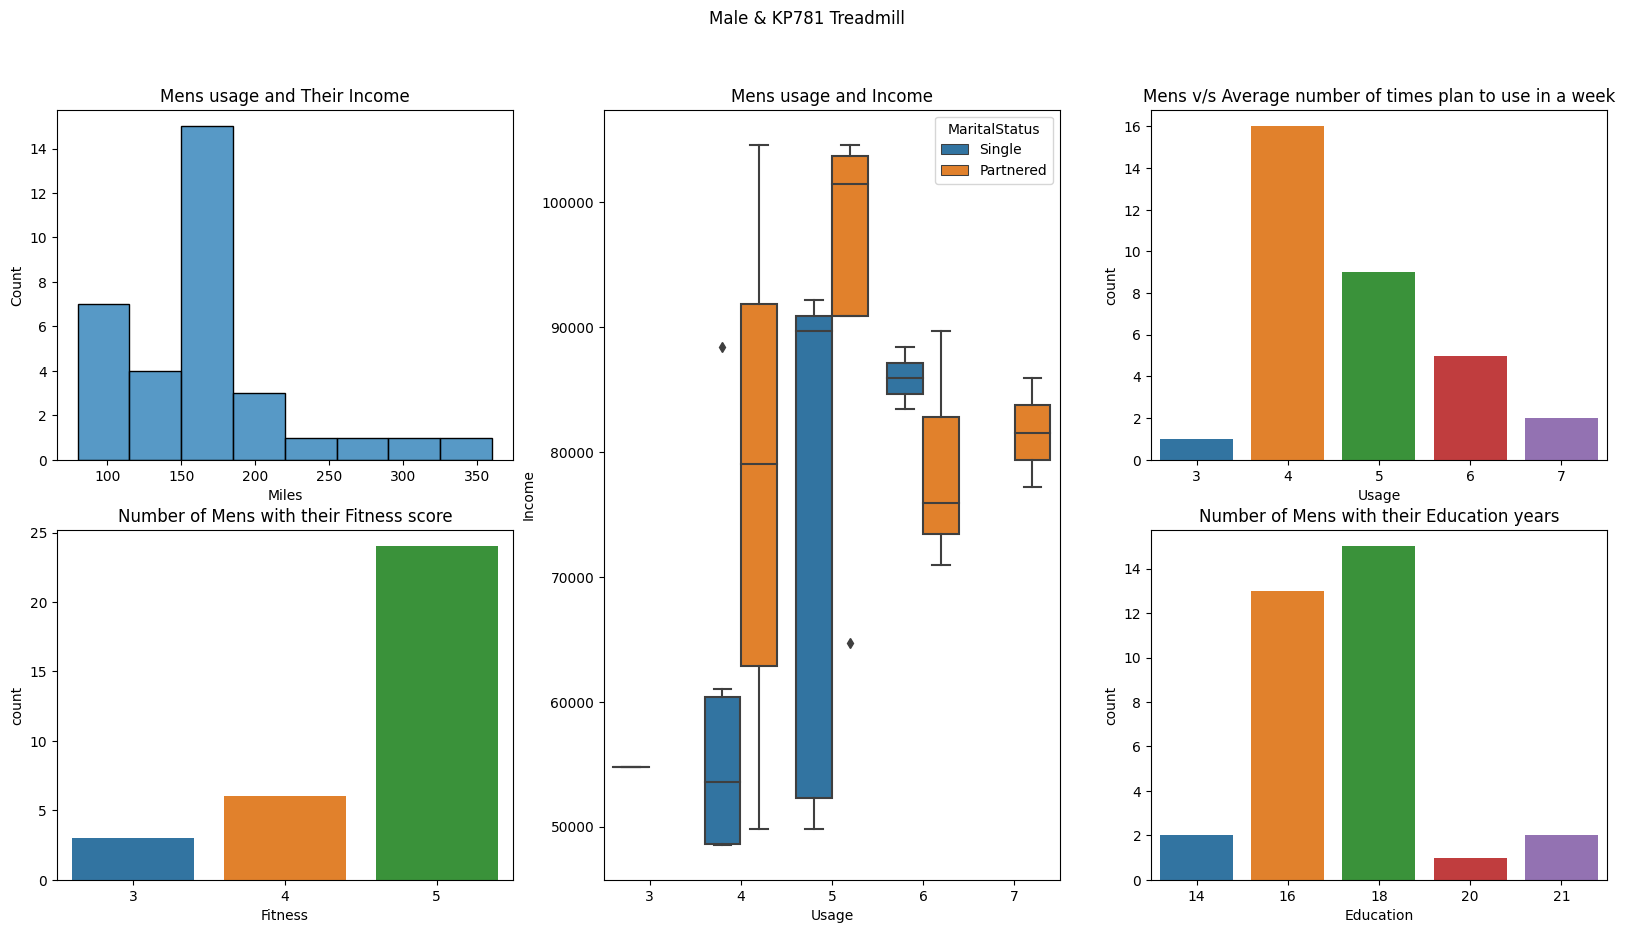

In [53]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Male & KP781 Treadmill")
plt.subplot(1,3,2)
sns.boxplot(data=T3_M,x='Usage',y='Income',hue='MaritalStatus')
plt.title('Mens usage and Income')
plt.subplot(2,3,1)
sns.histplot(data=T3_M,x='Miles')
plt.title('Mens usage and Their Income')
plt.subplot(2,3,4)
sns.countplot(data=T3_M,x='Fitness')
plt.title('Number of Mens with their Fitness score')
plt.subplot(2,3,6)
sns.countplot(data=T3_M,x='Education')
plt.title('Number of Mens with their Education years')
plt.subplot(2,3,3)
sns.countplot(data=T3_M,x='Usage')
plt.title('Mens v/s Average number of times plan to use in a week')

**Insights:**

1.male who opted KP781 most among them expects themselves to run around **`150`-200 miles**

2.male who opted KP781 most among them Scores themselves at **5 fitness scale**

3.male who opted KP781 have **highest median salary** who **were partnered**  with usage **5 times a week**

4.male who opted KP781 maximum among them usage plans is **4 times a week**

5.male who opted KP781 maximum among them have **education of 18 years** in their life

**Recommendation:** from above insights we can profile male who opted KP781 Treadmill


#Female(KP781)

In [54]:
T3_F = T3.loc[T3['Gender']=='Female']
T3_F.shape

(7, 9)

Text(0.5, 1.0, 'Female v/s Average number of times plan to use in a week')

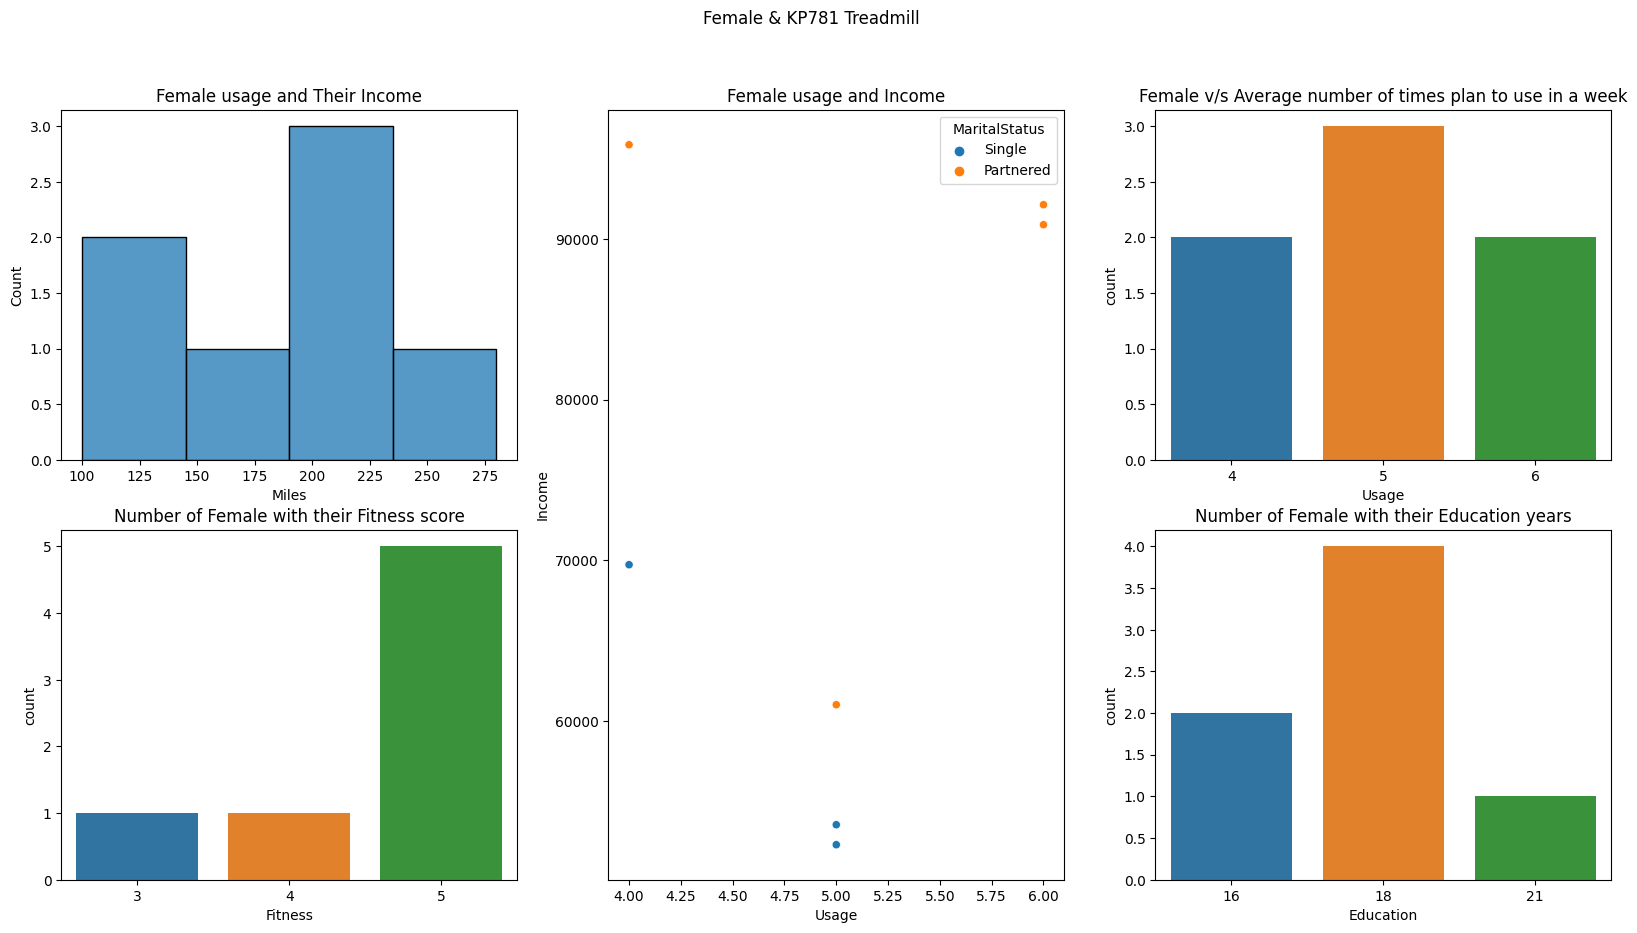

In [55]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Female & KP781 Treadmill")
plt.subplot(1,3,2)
sns.scatterplot(data=T3_F,x='Usage',y='Income',hue='MaritalStatus')
plt.title('Female usage and Income')
plt.subplot(2,3,1)
sns.histplot(data=T3_F,x='Miles')
plt.title('Female usage and Their Income')
plt.subplot(2,3,4)
sns.countplot(data=T3_F,x='Fitness')
plt.title('Number of Female with their Fitness score')
plt.subplot(2,3,6)
sns.countplot(data=T3_F,x='Education')
plt.title('Number of Female with their Education years')
plt.subplot(2,3,3)
sns.countplot(data=T3_F,x='Usage')
plt.title('Female v/s Average number of times plan to use in a week')

**Insights:**

1.female who opted KP781 most among them expects themselves to run in between **180-235 miles**

2.female who opted KP781 most among them Scores themselves at **5 fitness scale**

3.female who opted KP781 most of them have **high salary** greater than 90000

4.female who opted KP781 maximum among them usage plans is **5 times a week**

5.female who opted KP781 maximum among them have **education of 18 years** in their life

**Recommendation:** from above insights we can profile male who opted KP781 Treadmill

###**constructing-two-way-contingency-tables** for each AeroFit treadmill product  and compute all **conditional** and **marginal probabilities** along with their insights/impact on the business
**Marginal probability:** It refers to probability of occurence of simple event or Summation of Occurence of two or more event simultaniously
**Conditional Probability:**  probability of occurence of some event when an event already occured





## Two way contingency table for KP281

In [56]:
d1 = data.loc[data['Product']=='KP281']
d1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


Making Two-way contingency table around **[Usage]** vs **[Gender]** for KP281

In [57]:
pd.crosstab(index=d1['Usage'],columns= d1['Gender'],margins=True)

Gender,Female,Male,All
Usage,,,
2,13,6,19
3,19,18,37
4,7,15,22
5,1,1,2
All,40,40,80


From above table we can say
$$Marginal Probability$$
$$ P(\text{male}) $$
Probability of male who bought KP281:
= 40/80
=0.5
$$ P(\text{female}) $$
Probability of female who bought KP281:
= 40/80
=0.5

To calculate each conditional probability, we simply divide the joint probability by the marginal probability

$$Conditional Probability$$

**Q1** - what is the probability that a user is male and his usage is 2 times a week
$$P(\text{usage-2} | \text{male}) = \frac{P(\text{usage-2}, \text{male})}{P(\text{male})}$$

= (6/80) /(40/80)

= 0.15

**Q2** - what is the probability that a user is female and his usage is 2 times a week
$$P(\text{usage-2} | \text{male}) = \frac{P(\text{usage-2}, \text{male})}{P(\text{male})}$$

= (13/80)/(40/80)

=0.325



##Instead of individually calculating by below process using crosstab function we can calculate probabilties normalizing along columns according to its **usage** and **provided they are male and female**

In [58]:
pd.crosstab(index=d1['Usage'],columns= d1['Gender'],margins=True,normalize='columns')

Gender,Female,Male,All
Usage,,,
2,0.325,0.150,0.2375
3,0.475,0.450,0.4625
4,0.175,0.375,0.2750
5,0.025,0.025,0.0250


**Insights:** there is highest probability which is 0.4625 that if an individual buy KP281 trademill he would have a usage of 3 times a week
and female have higher probability than male with 3 time usage which is 0.475


##*From above insights we can see male and female preferences for KP281 however it is not sufficient to bring about useful insight for Treadmill recommendation in this way for that what we can do we can consider all Treadmill at once followed by consider male and femal then looking around the usage,fitness,education,MaritalStatus parameters for predicting choice prefrence*

##**Two way contingency table considering**
$${Gender+Treadmill}$$

In [59]:
pd.crosstab(index=data['Product'],columns=data['Gender'],margins='True')

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


$$Insights$$

$$Conditional Probabilities$$


1. Probability a  KP281 Trademill is bought given that she is female:
$$ P(\text{KP281,Female}) $$
= 40/76  = **0.5263**
$$ P(\text{KP281,male}) $$
for male it is:
= 40/104 = **0.384**

2.Probability a  KP481 Trademill is bought given that she is female:
$$ P(\text{KP481,Female}) $$
= 29/76  = **0.3815**
$$ P(\text{KP481,male}) $$
for male it is:
= 31/104 = **0.298**

3.Probability a  KP781 Trademill is bought given that she is female:
$$ P(\text{KP781,Female}) $$
= 7/76  = **0.092**
$$ P(\text{KP781,male}) $$
for male it is:
= 33/104 = **0.317**








**Insights:**  the above analysis shows insight as mentioned below

**Female** there is high probability which is 0.5263 she would go for KP281 treadmill and then for KP481 with 0.3815 probability and least preffered among female is KP781 with probability 0.092

**(Female preference:  KP281 > KP481 > KP781 )**


**Male** KP281 treadmill is most preffered by male with 0.384 followed by KP781 with probability 0.317 and least preffered among male is KP481 with  0.298 probability

**(Male preference:  KP281 > KP781 > KP481 )**


**Recommendations :** if individuals is male and female we can suggest according to their prefernce as from above insights furthermore firm need to have excess inventory to supply the most preferred treadmill by male and female as from above firm should have an inventory of KP281

##**Two Contingency Table considering:**        $${Gender + Treadmill +Usage}$$         

In [60]:
pd.crosstab(index=data['Product'],columns=[data['Gender'],data['Usage']],margins='True')

Gender  Female               Male                    All
Usage        2   3   4  5  6    2   3   4   5  6  7     
Product                                                 
KP281       13  19   7  1  0    6  18  15   1  0  0   80
KP481        7  14   5  3  0    7  17   7   0  0  0   60
KP781        0   0   2  3  2    0   1  16   9  5  2   40
All         20  33  14  7  2   13  36  38  10  5  2  180

## For simplifying the process and manually calculating it using it values we can calculate the probabilities along the Columns = 'Usage' & Gender using normalize in pd.crosstab() as shown below

In [61]:
pd.crosstab(index=data['Product'],columns=[data['Gender'],data['Usage']],normalize='columns')

Gender  Female                                         Male            \
Usage        2         3         4         5    6         2         3   
Product                                                                 
KP281     0.65  0.575758  0.500000  0.142857  0.0  0.461538  0.500000   
KP481     0.35  0.424242  0.357143  0.428571  0.0  0.538462  0.472222   
KP781     0.00  0.000000  0.142857  0.428571  1.0  0.000000  0.027778   

Gender                            
Usage           4    5    6    7  
Product                           
KP281    0.394737  0.1  0.0  0.0  
KP481    0.184211  0.0  0.0  0.0  
KP781    0.421053  0.9  1.0  1.0

$$Insights$$

$$ Conditional Probabilities$$

From above table we can say that if a Treadmill Purchaser is a

 **Female** : if she propose to use Treadmill 2 times on average a week then it is high probability she will go for KP281 as from past data the probability is 0.65 which is highest among females for 2 times per week use , similarly female for 3 times use preffered KP281 Treadmill ,for 4 time  KP281, 5 time per week use KP481 and 6 time KP781

**Male:**  2 time per week average usage the most preffered trademill is KP481
Wwith probability 0.5384

3 time usage mostly preffered  KP281 with probability 0.5

4 time usage mostly preffered  KP781 with probability 0.421

5,6,7 time usage mostly preffered KP781 with probability of 0.9,1,1  

**Recommendations:** as from above Inferential analysis we can recommend the treadmill with highest probability to the male and female individuals according to their usage in a week

##**Two Contingency Table considering:**        $${Gender + Treadmill +Age}$$  

To deal with this situation we can create bins for better insights for that we will use .cut() for creating separate columns for bins

In [62]:
d = data
bins= [10,20,30,40,50]
d['Age_bin']= pd.cut(d['Age'],bins)
d

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin
0,KP281,18,Male,14,Single,3,4,29562,112,"(10, 20]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(10, 20]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(10, 20]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(10, 20]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(10, 20]"
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]"
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 50]"
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 50]"
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 50]"


**Generating two-way contingency tables**   for above table with Gender trademill and age as criteria

In [63]:
pd.crosstab(columns=d['Product'],index=[d['Gender'],d['Age_bin']],margins=True)

Product          KP281  KP481  KP781  All
Gender Age_bin                           
Female (10, 20]      2      1      0    3
       (20, 30]     26     16      6   48
       (30, 40]      9     12      1   22
       (40, 50]      3      0      0    3
Male   (10, 20]      4      3      0    7
       (20, 30]     23     15     24   62
       (30, 40]     10     11      5   26
       (40, 50]      3      2      4    9
All                 80     60     40  180

## For simplifying the process and manually calculating it using it values we can calculate the probabilities along the index = 'Age_bin' & Gender using normalize in pd.crosstab() as shown below

In [64]:
pd.crosstab(columns=d['Product'],index=[d['Gender'],d['Age_bin']],normalize='index')

Product             KP281     KP481     KP781
Gender Age_bin                               
Female (10, 20]  0.666667  0.333333  0.000000
       (20, 30]  0.541667  0.333333  0.125000
       (30, 40]  0.409091  0.545455  0.045455
       (40, 50]  1.000000  0.000000  0.000000
Male   (10, 20]  0.571429  0.428571  0.000000
       (20, 30]  0.370968  0.241935  0.387097
       (30, 40]  0.384615  0.423077  0.192308
       (40, 50]  0.333333  0.222222  0.444444

$$Insights$$               
$${Conditional Probabilities}$$

From above table we can say that if a Treadmill Purchaser is a

 **Female** :
 1. if an individual is Female and her age comes in the range **[10,20]** years then highest probability is that she would choose **KP281 Treadmill** as its probability is **0.666**

 2. If her age is in range **[20,30]** years with highest probability she would choose **KP281** with **probability in range 0.54**

 3. if her age comes in range **[30,40]** years she would choose **KP481** treadmill with its highest probability **0.545**
  
4. if she is **above 40** years she would go for **KP281**

**Male:**  
1. if an individual is male and his age comes in the range **[10,20]** years then highest probability is that he would choose **KP281 Treadmill** as its probability is **0.5714**

2. If his age is  in range **[20,30]** years with highest probability he would choose **KP781** with **probability in range 0.387**

3. if his  age comes in range **[30,40]** years he would choose **KP481** treadmill with its highest probability **0.423**
  
4. if he is **above 40** years he would go for **KP781**

**Recommendations:** as from above Inferential analysis we can recommend the treadmill with highest probability to the male and female individuals according to their age lying in respective ranges

##**Two Contingency Table considering:**        $${Gender + Treadmill +Fitness}$$  

In [65]:
pd.crosstab(columns=data['Product'],index=[data['Gender'],data['Fitness']],margins=True)

Product         KP281  KP481  KP781  All
Gender Fitness                          
Female 1            0      1      0    1
       2           10      6      0   16
       3           26     18      1   45
       4            3      4      1    8
       5            1      0      5    6
Male   1            1      0      0    1
       2            4      6      0   10
       3           28     21      3   52
       4            6      4      6   16
       5            1      0     24   25
All                80     60     40  180

## For simplifying the process and manually calculating it using it values we can calculate the probabilities along the index = Fitness & Gender using normalize in pd.crosstab() as shown below

In [66]:
pd.crosstab(columns=data['Product'],index=[data['Gender'],data['Fitness']],normalize='index')

Product            KP281     KP481     KP781
Gender Fitness                              
Female 1        0.000000  1.000000  0.000000
       2        0.625000  0.375000  0.000000
       3        0.577778  0.400000  0.022222
       4        0.375000  0.500000  0.125000
       5        0.166667  0.000000  0.833333
Male   1        1.000000  0.000000  0.000000
       2        0.400000  0.600000  0.000000
       3        0.538462  0.403846  0.057692
       4        0.375000  0.250000  0.375000
       5        0.040000  0.000000  0.960000

$$Insights$$               
$${Conditional Probabilities}$$

From above table we can say that if a Treadmill Purchaser is a

 **Female** :
1. if an individual is Female and if she score herself at **1** at fitness scale  then highest probability is that she would choose **KP481 Treadmill** as its probability is **1**

2. if she score herself at **2**at fitness scale with highest probability she would choose **KP281** with probability **0.54**

3. if she score herself at **3** at fitness scale she would choose **KP281** treadmill with its highest probability **0.5777**
  
4. if she score herself at **4** at fitness scale she would choose **KP481** treadmill with its highest probability **0.5**

5. if she score herself at **5** at fitness scale she would choose **KP781** treadmill with its highest probability **0.833**

**Male:**  
1. if an individual is male and if he score himself at **1** at fitness scale  then highest probability is that he would choose **KP281 Treadmill** as its probability is **1**

2. if he score himself at **2** at fitness scale with highest probability he would choose **KP481** with probability **0.60**

3. if he score himself at **3** at fitness scale he would choose **KP281** treadmill with its highest probability **0.538**
  
4. if he score  himself at **4** at fitness scale he would choose **KP481** or **KP781** treadmill as their probability are same as **0.375**

5. if he score himself at **5** at fitness scale he would choose **KP781** treadmill with its highest probability **0.96**

**Recommendations:** as from above Inferential analysis we can recommend the treadmill with highest probability to the male and female individuals according to their Fitness score  